<a href="https://colab.research.google.com/github/woodRock/deep-learning-goodfellow/blob/main/chapter_4_numerical_computation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 4 | Numerical Computation

Even just evaluating mathematical function on a digital computer can be difficult when the function involves real numbers, which cannot be represented precisely using a finite amount of memory.

References:
1. Cauchy, A. (1847). Méthode générale pour la résolution des systemes d’équations simultanées. Comp. Rend. Sci. Paris, 25(1847), 536-538.
2. Konak, A., Coit, D. W., & Smith, A. E. (2006). Multi-objective optimization using genetic algorithms: A tutorial. Reliability engineering & system safety, 91(9), 992-1007.
3. Russell, S. J., & Norvig, P. (2016). Artificial intelligence: a modern approach. Pearson.
4. Boyd, S., & Vandenberghe, L. (2004). Convex optimization. Cambridge university press.
5. Nocedal, J., & Wright, S. J. (Eds.). (1999). Numerical optimization. New York, NY: Springer New York.

# Overflow and underflow

The softmax function is often used to predict the probabliites associated with a multinoulli distribution. The softmax can be defined as

$$
  softmax(x)_i = \frac{exp(x_i)}{\sum^{n}_{j=1}exp(x_j)}
$$
If c is very negative, then $exp(c)$ will underflow. If c is very large then $exp(c)$ will overflow.

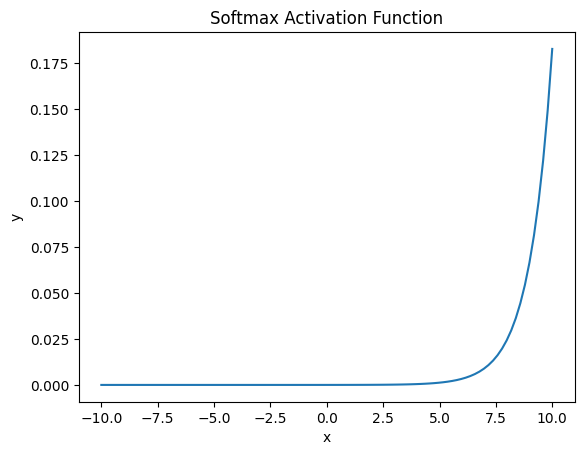

softmax(1_000_000): [nan]
softmax(-1_000_000): [nan]


<ipython-input-43-bc79b34f4aa7>:5: RuntimeWarning: overflow encountered in exp
  temp = np.exp(x)
<ipython-input-43-bc79b34f4aa7>:6: RuntimeWarning: invalid value encountered in divide
  return temp / (np.sum(temp, axis=0, keepdims=True))


In [43]:
import numpy as np
import matplotlib.pyplot as plt

def softmax(x):
    temp = np.exp(x)
    return temp / (np.sum(temp, axis=0, keepdims=True))

# Plot the softmax activation function.
x = np.linspace(-10, 10, 100)
y = softmax(x)
plt.title('Softmax Activation Function')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y)
plt.show()

# Overflow
numerical_overflow = softmax([1_000_000])
print(f"softmax(1_000_000): {numerical_overflow}")

# Underflow
numerical_underflow = softmax([-1_000_000])
print(f"softmax(-1_000_000): {numerical_underflow}")

Both of these difficulties can be resolved by instead evaluating $softmax(z)$ where $z = x - max_ix_i$. Simple algebra shows that the value of the softmax function is not changed analytically by adding or substracting a scalar from the input vector. Subtracting $max_ix_i$ results in the largest argument to exp being 0, which rules out the possibiility of overflow. Likewise at least one term in the denominator has a value of 1, which rules out the possibility of underflow in the denominator leading to a division by zero.

In [44]:
def softmax(x):
    temp = np.exp(x  - np.max(x))
    return temp / (np.sum(temp, axis=0, keepdims=True))

softmax(np.array([1_000_000]))

array([1.])

# Poor conditioning

**Conditioning** refers to how rapidly a function changes with respect to small changes in its inputs.

Functions that change rapidly when their inputs are perturbed slightly can be problematic for scientific computation because rounding errors in inputs can result in large changes in the output.

Consider the function $f(x) = A^{-1}x$. When $A \in \mathbb{R}^{m\times n}$ has an eigen value decomposition, its **condition number** is

$$
  max_{i,j} = |\frac{\lambda_i}{\lambda_j}|
$$

That is the ratio of the magnitude of the largest and smallest eigenvalue. When this number is large , matrix inversion is particularly sensitive to error in the input.

In [45]:
import numpy as np

A = np.array([[3,2],[1,4]])
A_inv = np.linalg.inv(A)
x = np.array([1,2])
y1 = A_inv @ x
print(f"A^{-1} x = {y1}")

# Perturb the matrix slightly.
# Change one value from 2 -> 1.
A = np.array([[3,1],[1,4]])
A_inv = np.linalg.inv(A)
x = np.array([1,2])
y2 = A_inv @ x
print(f"A^{-1} x = {y2}")

A^-1 x = [0.  0.5]
A^-1 x = [0.1818 0.4545]


# Gradient-Based Optimization

The function we want to minimize or maximize is called the **objective function** or **criterion**. When we are minimizing it, we may also call it the **cost function**, **loss function** or **error function**.

We often denote the value that minimizes or maximizes a function with superscript *. For example we might say $x^* = arg min f(x)$.

We can thus reduce $f(x)$ by moving $x$ in small steps with the opoosite sign of the derivitive. This technique is called gradient descent (Cauchy 1847).

$$
  f(x + \epsilon) \approx f(x) + \epsilon f'(x) \\
  f(x - \epsilon sign(f'(x)))
$$

When $f'(x)$ provides no information about which direction to move. Points where $f'(x) = 0$ are known as **critical points** or **stationary points**.

A **local minimum** is a point where $f(x)$ is lower than all its neighbouring points, so it is no longer possible to decrease $f(x)$ by making infinitesimal steps.

A **local maximum** is a point where $f(x)$ is higher than at all neighbouring points, so it is no longer possible to increase $f(x)$ by making infinitesimal steps.

Some points are nither maxima nor minima. These are known as **saddle points**.

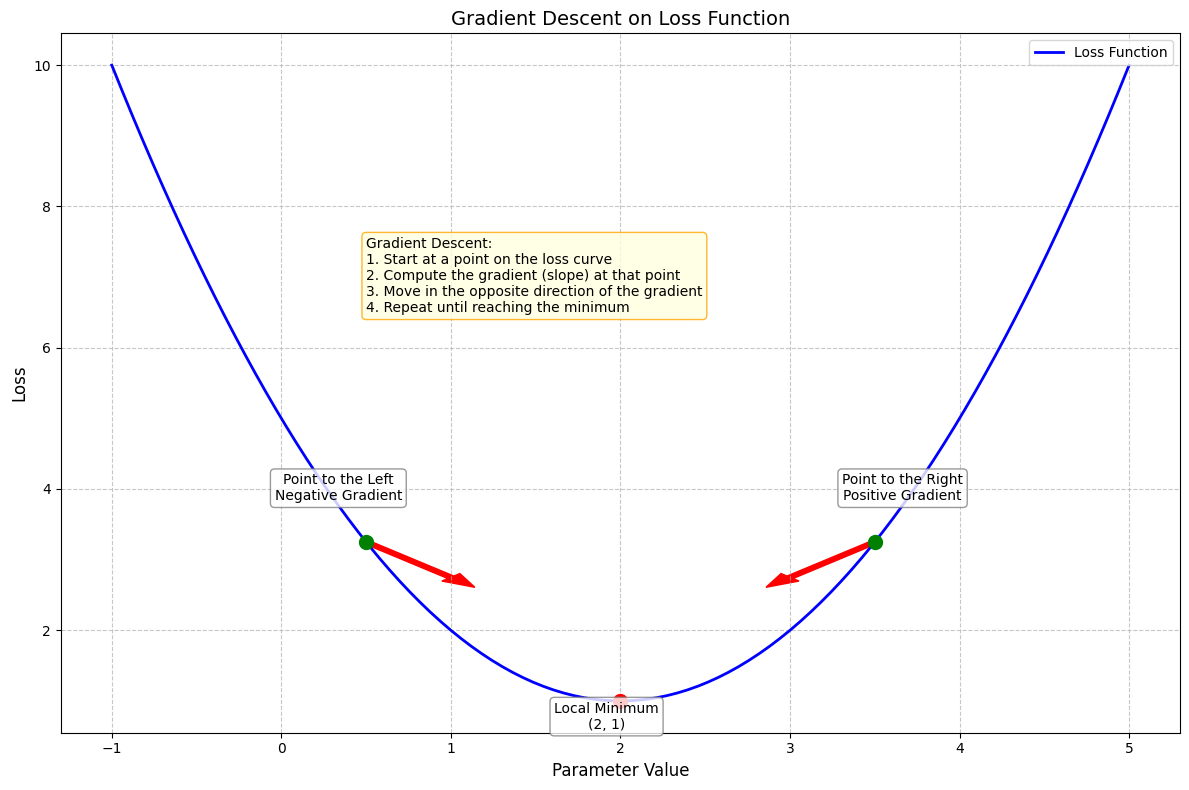

In [46]:
import numpy as np
import matplotlib.pyplot as plt

def loss_function(x):
    return (x - 2)**2 + 1

def gradient(x):
    return 2 * (x - 2)

# Create data for plotting
x = np.linspace(-1, 5, 100)
y = loss_function(x)

# Create the plot
plt.figure(figsize=(12, 8))
plt.plot(x, y, 'b-', linewidth=2, label='Loss Function')

# Plot the minimum point
min_x = 2
min_y = loss_function(min_x)
plt.plot(min_x, min_y, 'ro', markersize=10)
plt.annotate('Local Minimum\n(2, 1)', (min_x, min_y), textcoords="offset points", xytext=(-10,-20), ha='center', fontsize=10, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

# Plot points to the left and right of the minimum
left_x, right_x = 0.5, 3.5
left_y, right_y = loss_function(left_x), loss_function(right_x)

plt.plot(left_x, left_y, 'go', markersize=10)
plt.plot(right_x, right_y, 'go', markersize=10)

plt.annotate('Point to the Left\nNegative Gradient', (left_x, left_y), textcoords="offset points", xytext=(-20,30), ha='center', fontsize=10, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))
plt.annotate('Point to the Right\nPositive Gradient', (right_x, right_y), textcoords="offset points", xytext=(20,30), ha='center', fontsize=10, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

# Add arrows to show gradient descent direction
plt.arrow(left_x, left_y, 0.5, -0.5, head_width=0.15, head_length=0.2, fc='r', ec='r', width=0.05)
plt.arrow(right_x, right_y, -0.5, -0.5, head_width=0.15, head_length=0.2, fc='r', ec='r', width=0.05)

# Set labels and title
plt.xlabel('Parameter Value', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Gradient Descent on Loss Function', fontsize=14)
plt.legend(loc='upper right')

# Add text explanation
plt.text(0.5, 6.5, "Gradient Descent:\n"
         "1. Start at a point on the loss curve\n"
         "2. Compute the gradient (slope) at that point\n"
         "3. Move in the opposite direction of the gradient\n"
         "4. Repeat until reaching the minimum",
         fontsize=10, bbox=dict(boxstyle="round,pad=0.3", fc="lightyellow", ec="orange", alpha=0.8))

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

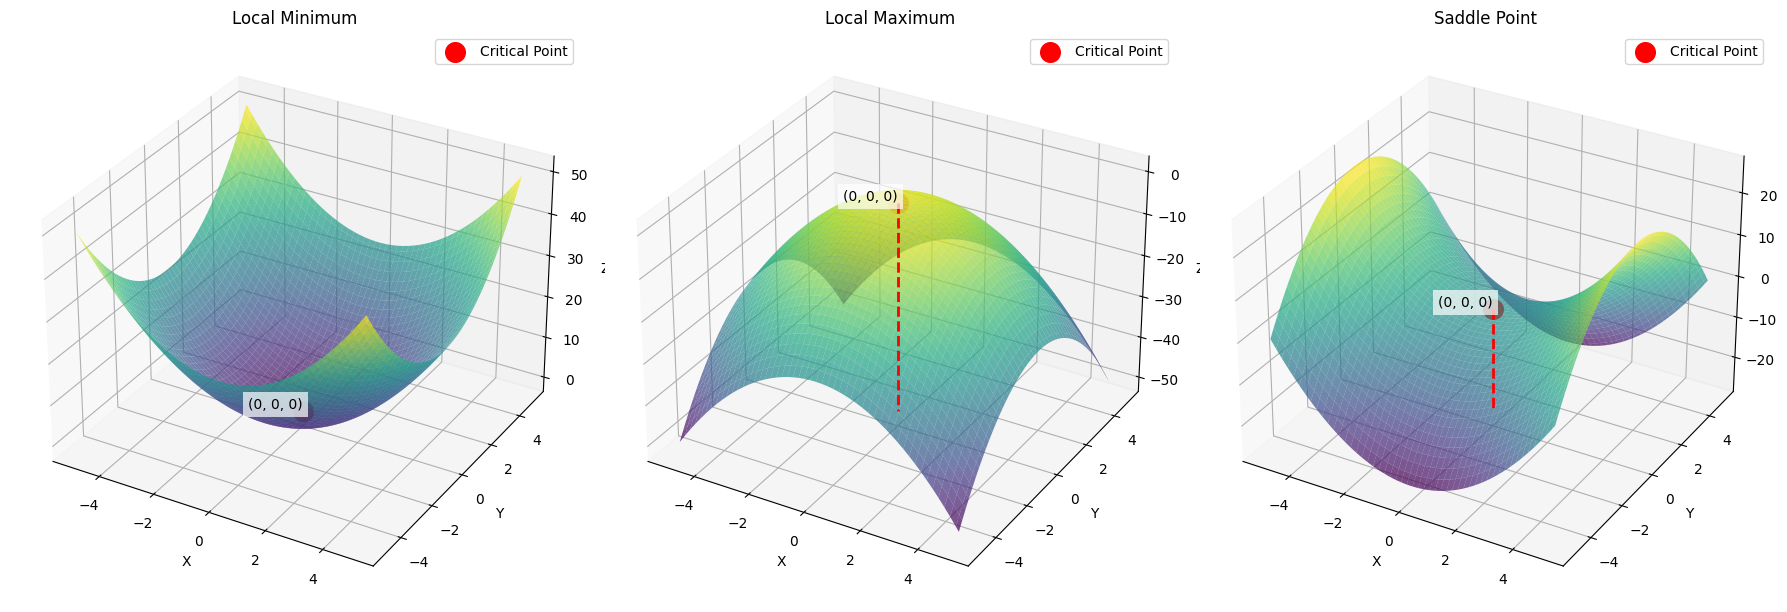

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_critical_point(ax, func, title, critical_point):
    x = np.linspace(-5, 5, 100)
    y = np.linspace(-5, 5, 100)
    X, Y = np.meshgrid(x, y)
    Z = func(X, Y)

    # Plot the surface with slightly increased transparency
    ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title)

    # Annotate the critical point
    x_c, y_c, z_c = critical_point

    # Add a vertical line from the critical point to the xy-plane
    ax.plot([x_c, x_c], [y_c, y_c], [z_c, ax.get_zlim()[0]], color='red', linestyle='--', linewidth=2, zorder=10)

    # Plot the critical point with increased size and zorder
    ax.scatter(x_c, y_c, z_c, color='red', s=200, label='Critical Point', zorder=11)

    # Add text annotation with adjusted position and zorder
    ax.text(x_c, y_c, z_c, f'({x_c}, {y_c}, {z_c})', fontsize=10,
            horizontalalignment='right', verticalalignment='bottom',
            zorder=11, bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

    ax.legend()

# Create the figure and subplots
fig = plt.figure(figsize=(18, 6))

# Local Minimum: f(x,y) = x^2 + y^2
ax1 = fig.add_subplot(131, projection='3d')
plot_critical_point(ax1, lambda x, y: x**2 + y**2, 'Local Minimum', (0, 0, 0))

# Local Maximum: f(x,y) = -(x^2 + y^2)
ax2 = fig.add_subplot(132, projection='3d')
plot_critical_point(ax2, lambda x, y: -(x**2 + y**2), 'Local Maximum', (0, 0, 0))

# Saddle Point: f(x,y) = x^2 - y^2
ax3 = fig.add_subplot(133, projection='3d')
plot_critical_point(ax3, lambda x, y: x**2 - y**2, 'Saddle Point', (0, 0, 0))

plt.tight_layout()
plt.show()

## ELI5: Partial derivitives

Imagine you have a magic ice cream sundae machine. This machine has two handles:

A chocolate handle
A sprinkle handle

Now, let's say the amount of yumminess of your ice cream sundae depends on how much you turn each handle.
A partial derivative is like asking: "How much does the yumminess change if I turn just one handle a tiny bit, while leaving the other handle alone?"
Let's break it down:

1. Chocolate Handle Partial Derivative:
  - You turn the chocolate handle just a little bit.
  - You don't touch the sprinkle handle at all.
  - You see how much the yumminess changes.
  - This change in yumminess is the partial derivative for the chocolate handle.

2. Sprinkle Handle Partial Derivative:
  - This time, you turn the sprinkle handle just a little bit.
  - You don't touch the chocolate handle at all.
  - You see how much the yumminess changes.
  - This change in yumminess is the partial derivative for the sprinkle handle.

The key ideas are:

- You're looking at how one thing changes when you only change one other thing.
- You keep everything else the same.
- It's like isolating one effect at a time.

In grown-up math:

- The handles are called variables (often written as x, y, z, etc.).
- The yumminess is called a function.
- The little changes are written with a funny-looking 'd' called "delta" ($\delta$).

So when you see $\partial	f/\partial	x$ , it's like asking "How much does f change when we change x a tiny bit, keeping everything else the same?"
Partial derivatives are super useful because they help us understand complicated things by looking at one piece at a time. It's like figuring out a big puzzle by looking at each piece carefully!

A point that obtains the absolute lowest value of $f(x)$ is a global minimum. There can only be one global minimum or multiple global minima of the function.

We often minimize functions that have multiple inputs $f: \mathbb{R}^n \to \mathbb{R}$. For the concept of minimization to make sense, there must still be only one (scalar) output. Excpet for the case of multi-objective optimization (Konak 2006).

For functions with multiple inputs, we must make use of the concept of **partial derivatives**. The partial derivative $\frac{\partial}{\partial x_i} f(x)$ measures how $f$ changes as only the variable $x_i$ increases at a point $x$. The **gradient** generalizes the notion of derivative to the case where the derivative is with respect to a vector: the gradeint of $f$ is the vector containing all the partial derivatives, denoted $\nabla_x f(x)$. Element $i$ of the gradient is the partial derivative of $f$ with respect to $x_i$.

The dot product of two vectors can be rewritten in terms of norms. Specifically,

$$
  x^Ty = ||x||_2||y||_2 \cos \theta
$$

The **directional derivative** in direction **u** (a unit vector) is the slope of the function $f$ in direction $u$. In other words, the directional derivative is the derivative of the function $f(x + \alpha u)$ with respect to $\alpha$, evaluated at $alpha = 0$. Using the chain rule of calculus, we see that $\frac{\partial}{\partial a} f(x + \alpha u)$ evaluates to $u^T\nabla_xf(x)$ when $alpha = 0$.

To mimize $f$ we would like to find the direction in which $f$ decreases the fastest. We can do this using the directional derivative.

$$
  min_{u,u^Tu=1} u^T \nabla_x f(x) \\
  min_{u,u^Tu=1} ||u||_2||\nabla_x f(x)||_2 \cos \theta
$$

where $\theta$ is the angule between $u$ and the gradient. Substituting $||u||_2 = 1$ and ignoring factors that do not depend on $u$, this simplifies to $min_u \cos \theta$. This is mimimized when $u$ points in the opposite direction as the gradient. In other words, the gradient points directly uphill, the negative gradient points downhill. We can decrease $f$ by moving in the direction of the negative gradient. This is known as the **method of steepest descent** or **gradient descent**.

Steepest descent proposes a new point

$$
  x' = x - \epsilon \nabla_x f(x)
$$

where $\epsilon$ is the **learning rate**, a positive scalar determining the size of the step.

Although gradient descent is limited to opimization of continious spaces, the most general concept of repeatedly making a small move (that is approximately the best small move) toward better configurations can be generalized to discrete spaces. Ascending an objective function of discrete parameters is called **hill climbing** (Russell 2016).













# Beyond the Gradient: Jacobian and Hessian Matrices

## The Jacobian Matrix

The Jacobian matrix carries all of the partial differential information. The Jacobian matrix is fundamentally what a transformation looks like when you zoom in near a specific point.

The Jacobian matrix
: https://www.youtube.com/watch?v=bohL918kXQk&t=3s

Computing a Jacobian matrix
: https://www.youtube.com/watch?v=CGbBbH1e7Yw

The Jacobian Determinant
: https://www.youtube.com/watch?v=p46QWyHQE6M

## ELI5: Jacobian Matrix
Each box in this chart tells you how sensitive each light is to each knob.

- If a number in the chart is big, it means that light changes a lot when you turn that knob.
- If a number is small, the light doesn't change much when you turn that knob.
- If a number is zero, turning that knob doesn't change that light at all!

The Jacobian matrix is super helpful because:

1. It tells you how everything is connected.
2. It helps predict how the lights will change when you turn the knobs.
3.Scientists and engineers use it to understand complicated systems with lots of "knobs" and "lights".

In grown-up math, the "knobs" are variables, the "lights" are functions, and the changes are called partial derivatives. But the idea is the same – it's all about understanding how things change together!


## The Jacobian matrix

Sometimes we need to find all the partial derivatives of a function whose input and output are both vectors. The matrix containing all such partial derivatives is known as a **Jacobian matrix**. Specifically, if we have a function $f: \mathbb{R}^m \to \mathbb{R}^n$, then the Jacobian matrix $J \in \mathbb{R}^{n\times m}$ of $f$ is defined such that $J_{i,j} = \frac{\partial}{\partial x_j}f(x)_i$.

In [48]:
import numpy as np

def jacobian(func, x, epsilon=1e-8):
    """
    Compute the Jacobian matrix of a vector-valued function.

    Args:
    func: The vector-valued function.
    x: The point at which to compute the Jacobian.
    epsilon: Small value for numerical approximation.

    Returns:
    The Jacobian matrix.
    """
    f = func(x)
    n = len(x)
    m = len(f)
    J = np.zeros((m, n))

    for j in range(n):
        x_plus = x.copy()
        x_minus = x.copy()
        x_plus[j] += epsilon
        x_minus[j] -= epsilon
        J[:, j] = (func(x_plus) - func(x_minus)) / (2 * epsilon)

    return J

# Example usage:
def example_func(x):
    return np.array([x[0] + np.sin(x[1]),
                     np.sin(x[0]) + x[1]])

x0 = np.array([0., 1.])
J = jacobian(example_func, x0)
print("Jacobian at x =", x0)
print(J)

Jacobian at x = [0. 1.]
[[1.     0.5403]
 [1.     1.    ]]


# The Second Derivative

We are also somtimes interested in a derivative of a derivative. This is known as a **second derivative**. For example, for a function $f: \mathbb{R}^m \to \mathbb{R}^n$, the derivative with respect to $x_i$ of the derivative of $f$ with respect to $x_j$ is denoted as $ \frac{\partial^2}{\partial x_i \partial x_j}f$

In a single dimension we can denote $\frac{d^2}{dx^2}f$ by $f''(x)$. The second derivative determines the curvature of a function.

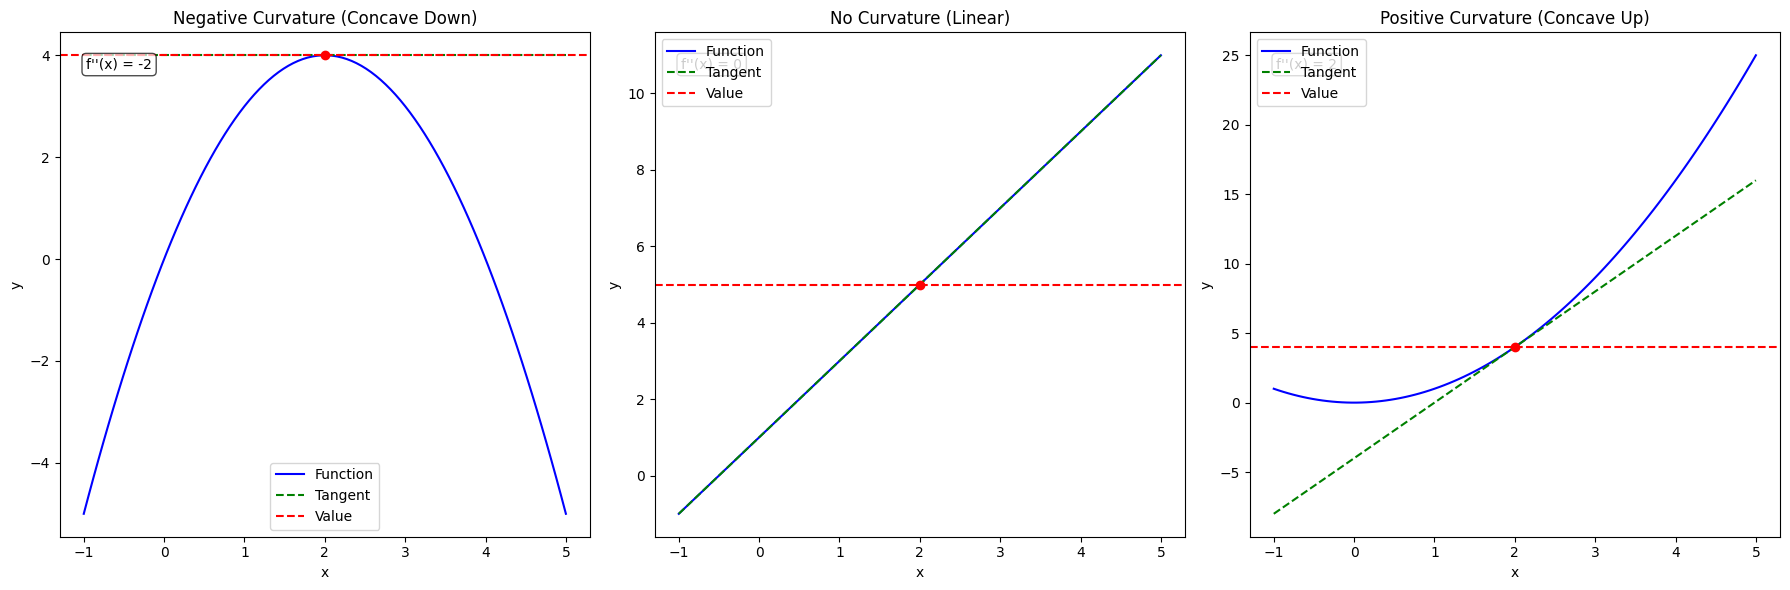

In [50]:
import numpy as np
import matplotlib.pyplot as plt

def plot_curvature(ax, func, second_derivative, x_range, title):
    x = np.linspace(x_range[0], x_range[1], 100)
    y = func(x)

    # Plot the function
    ax.plot(x, y, 'b-', label='Function')

    # Choose a point to demonstrate the curvature
    x0 = (x_range[0] + x_range[1]) / 2
    y0 = func(x0)

    # Plot the tangent line
    tangent = lambda x: func(x0) + (x - x0) * (func(x0 + 0.01) - func(x0 - 0.01)) / 0.02
    ax.plot(x, tangent(x), 'g--', label='Tangent')

    # Plot the point and the value line
    ax.plot(x0, y0, 'ro')
    ax.axhline(y=y0, color='r', linestyle='--', label='Value')

    # Add labels and title
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(title)
    ax.legend()

    # Add text for second derivative
    ax.text(0.05, 0.95, f"f''(x) = {second_derivative}", transform=ax.transAxes,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

# Create the figure and subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Negative curvature (concave down)
plot_curvature(ax1, lambda x: -x**2 + 4*x, "-2", (-1, 5), "Negative Curvature (Concave Down)")

# No curvature (linear function)
plot_curvature(ax2, lambda x: 2*x + 1, "0", (-1, 5), "No Curvature (Linear)")

# Positive curvature (concave up)
plot_curvature(ax3, lambda x: x**2, "2", (-1, 5), "Positive Curvature (Concave Up)")

plt.tight_layout()
plt.show()

# Hessian Matrix

When our function has multiple input dimensions, ther are many second derivatives. Theser derivatives can be collected together into a matrix called the **Hessian matrix**. The Hessian matrix $H (f) (x)$ is defined as

$$
  H(f)(x)_{i,j} = \frac{\partial^2}{\partial x_i \partial x_j} f(x)
$$

Equivalently, the Hessian is the Jacobian of the gradient.

In [49]:
import numpy as np

def hessian(func, x, epsilon=1e-5):
    """
    Compute the Hessian matrix of a scalar-valued function.

    Args:
    func: The scalar-valued function.
    x: The point at which to compute the Hessian.
    epsilon: Small value for numerical approximation.

    Returns:
    The Hessian matrix.
    """
    n = len(x)
    H = np.zeros((n, n))
    f_x = func(x)

    for i in range(n):
        for j in range(n):
            x_ij = x.copy()
            x_ij[i] += epsilon
            x_ij[j] += epsilon

            x_i = x.copy()
            x_i[i] += epsilon

            x_j = x.copy()
            x_j[j] += epsilon

            H[i, j] = (func(x_ij) - func(x_i) - func(x_j) + f_x) / (epsilon**2)

    # Make the Hessian symmetric
    H = (H + H.T) / 2

    return H

# Example usage:
def example_func(x):
    return x[0]**2 * x[1] + x[1]**3

x0 = np.array([1.0, 2.0])
H = hessian(example_func, x0)
print("Hessian at x =", x0)
print(H)

# Verify with analytical Hessian
def analytical_hessian(x):
    return np.array([[2*x[1], 2*x[0]],
                     [2*x[0], 6*x[1]]])

print("\nAnalytical Hessian:")
print(analytical_hessian(x0))

# Compare numerical and analytical results
print("\nDifference:")
print(H - analytical_hessian(x0))

Hessian at x = [1. 2.]
[[ 4.  2.]
 [ 2. 12.]]

Analytical Hessian:
[[ 4.  2.]
 [ 2. 12.]]

Difference:
[[0. 0.]
 [0. 0.]]


Anywhere the second partial derivatives are continious, the differential operators are commutative; that is, their order can be swapped.

$$
  \frac{\partial^2}{\partial x_i \partial x_j} f(x) = \frac{\partial^2}{\partial x_j \partial x_i} f(x)
$$

Hessian matrix are symmetric, since $H_{i,j} = H{j,i}$

The second derivative in a specific direction represented by a unit vector $d$ is given by $d^THd$. When $d$ is an eigenvector of $H$, the second derivative in that direction is given by the corresponding eigenvalue. For other directions of $D$, the directional second derivative is a weighted average of all eigen values with weights between 0 adn 1, and eigenvectors that have a smaller angle with $d$ recieving more weight. The maximum eigenvalue determines the maximum second derivative. The minimum eigenvalue determines the minimum second derivative.

The (directional) second derivative tells us how well we can expect a gradient descent step to perform. We can make a second-order Taylor series approximation to the function $f(x)$ around the current point $x^{(0)}$:

$$
  f(x) \approx f(x^{(0)}) + (x-x^{(0)})^Tg + \frac{1}{2}(x - x^{(0)})^T H(x-x^{(0)})
$$

where$g$ is the gradient and $H$ is the Hessian at $x^{(0)}$. If we use a learning rate of $\epsilon$, then the new point $x$ will be given by $x^{(0)}-\epsilon g$. Substituting this into our approximation we obtain.

$$
  f(x^{(0)} - \epsilon g) \approx = f(x^{(0)}) - \epsilon g^Tg + \frac{1}{2}\epsilon^2 g^T H g
$$

There are three terms here: the orginal value of the function, the expected improvement due to the slope of the function, and the correction we must apply to account for the curvature of the function.

Solving for the most optimal step size that decreases the Taylor series approximation of the function the most yields:

$$
  \epsilon^* = \frac{g^Tg}{g^THg}
$$

In the worst case $g$ aligns with the eigenvector of $H$ corresponding to the maximal eigenvalue $\lambda_{max}$, the the optimal step size is given by $\frac{1}{\lambda_{max}}$


# Second Derivative Test

When $f'(x) = 0$ and $f''(x) > 0$ we can conclude that $x$ is at a local minimum.

When $f'(x) = 0$ and $f''(x) < 0$ we can conclude that $x$ is a local maximum.

Unfortunately, whten $f''(x) = 0$, the test is inconclusive. In this case $x$ may be a saddle point or a part of a flat region.

Using eigendecomposition of the Hessian matrix, we can generalize the second derivative test to multiple dimensions. At a critical point where $\nabla_x f(x) = 0$, we can examine the eigenvalues of the Hessian to determine whether the critical point is a local maxmium, local minimum or saddle point.

What the hessian matrix tells us:
- When the Hessian is postive definite (all its eigenvalues are positive), the point is a local minimum.
- Likewise, when the Hessian is negative definite (all its eigenvalues are negative), the point is a local maximum.
- When at least one iegin value is postive and at least one iegienvalue is negative, we know that $x$ is a local maximum on one cross section of $f$ but a local minimum on another cross section.
- The multidimensional second derivative test can be inconclusive. The test is inconclusive whenver all the nonzero eignevalues have the same sign but at least one eigenvalue is zero. This is because the univariate second derivative test is inconclusive in the cross section corresponding to the zero eigenvalue.


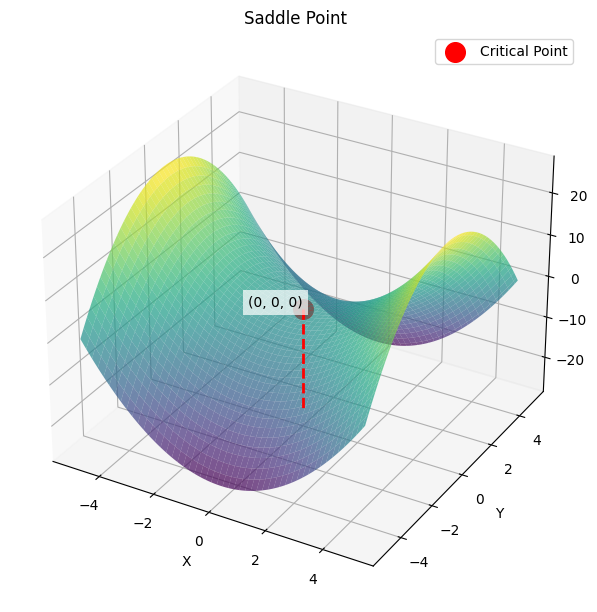

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_critical_point(ax, func, title, critical_point):
    x = np.linspace(-5, 5, 100)
    y = np.linspace(-5, 5, 100)
    X, Y = np.meshgrid(x, y)
    Z = func(X, Y)

    # Plot the surface with slightly increased transparency
    ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title)

    # Annotate the critical point
    x_c, y_c, z_c = critical_point

    # Add a vertical line from the critical point to the xy-plane
    ax.plot([x_c, x_c], [y_c, y_c], [z_c, ax.get_zlim()[0]], color='red', linestyle='--', linewidth=2, zorder=10)

    # Plot the critical point with increased size and zorder
    ax.scatter(x_c, y_c, z_c, color='red', s=200, label='Critical Point', zorder=11)

    # Add text annotation with adjusted position and zorder
    ax.text(x_c, y_c, z_c, f'({x_c}, {y_c}, {z_c})', fontsize=10,
            horizontalalignment='right', verticalalignment='bottom',
            zorder=11, bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

    ax.legend()

# Create the figure and subplots
fig = plt.figure(figsize=(18, 6))

# Saddle Point: f(x,y) = x^2 - y^2
ax3 = fig.add_subplot(133, projection='3d')
plot_critical_point(ax3, lambda x, y: x**2 - y**2, 'Saddle Point', (0, 0, 0))

plt.tight_layout()
plt.show()

The step size must be small enough to avoid overshooting the minimum and going uphill in directions with strong positive curvature. This usually means that step size is too small to make significant progress in other directions with less curvature.

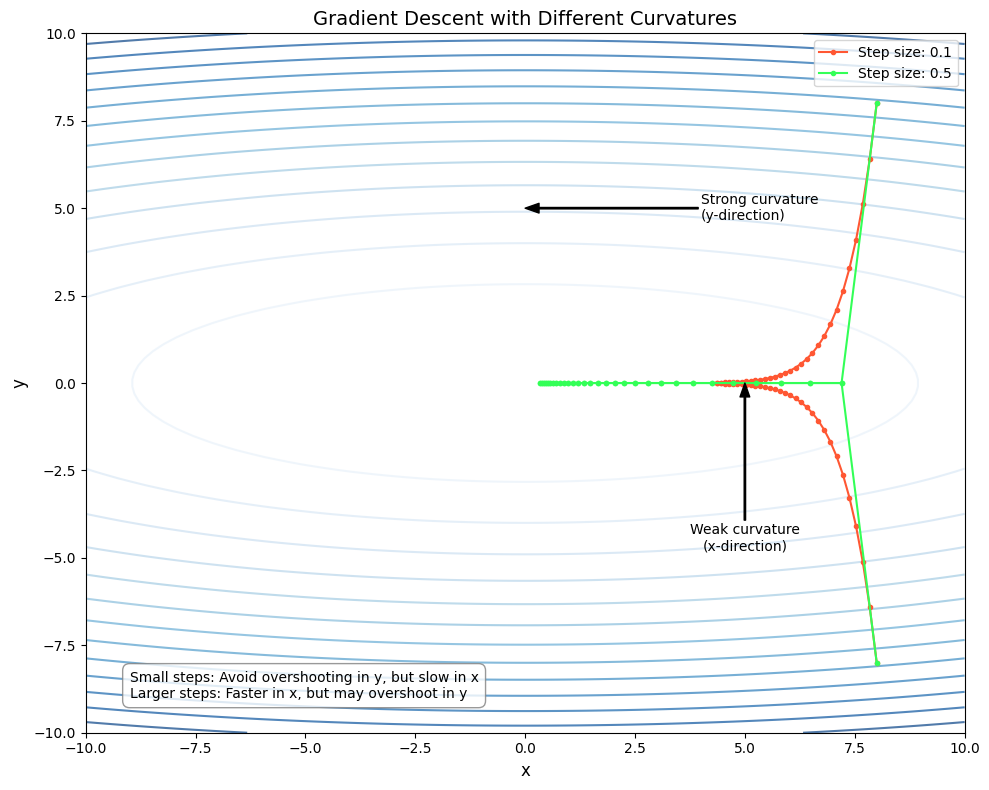

In [54]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return 0.1 * x**2 + y**2

# Create a grid of points
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot contours with a simpler color scheme
contours = ax.contour(X, Y, Z, levels=15, cmap='Blues', alpha=0.7)

# Gradient descent paths
start_points = [(8, 8), (8, -8)]
step_sizes = [0.1, 0.5]

def gradient_descent(start, step_size, num_steps):
    path = [start]
    x, y = start
    for _ in range(num_steps):
        grad_x, grad_y = 0.2 * x, 2 * y
        x -= step_size * grad_x
        y -= step_size * grad_y
        path.append((x, y))
    return np.array(path)

# Plot gradient descent paths
for start in start_points:
    for step_size in step_sizes:
        path = gradient_descent(start, step_size, 30)
        ax.plot(path[:, 0], path[:, 1], '-o', markersize=3,
                color='#FF5733' if step_size == 0.1 else '#33FF57',
                label=f'Step size: {step_size}' if start == start_points[0] else "")

# Add annotations
ax.annotate('Strong curvature\n(y-direction)', xy=(0, 5), xytext=(4, 5),
            arrowprops=dict(facecolor='black', width=1, headwidth=7, headlength=10),
            fontsize=10, ha='left', va='center')
ax.annotate('Weak curvature\n(x-direction)', xy=(5, 0), xytext=(5, -4),
            arrowprops=dict(facecolor='black', width=1, headwidth=7, headlength=10),
            fontsize=10, ha='center', va='top')

# Set labels and title
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_title('Gradient Descent with Different Curvatures', fontsize=14)
ax.legend(loc='upper right', fontsize=10)

# Add explanation text
explanation = ("Small steps: Avoid overshooting in y, but slow in x\n"
               "Larger steps: Faster in x, but may overshoot in y")
ax.text(0.05, 0.05, explanation, transform=ax.transAxes, fontsize=10,
        bbox=dict(facecolor='white', edgecolor='gray', alpha=0.8, boxstyle='round,pad=0.5'))

plt.tight_layout()
plt.show()

# Newton's method

THis issues can be resolved by using information from the Hessian matrix to guide the search. The simplest method for doing so is known as **Newton's method**. Newton's method is based on using a second-order Taylor series expansion to approximate $f(x)$ near some point $x^{(0)}$.

$$
  f(x) \approx f(x^{(0)}) + (x-x^{(0)})^T \nabla_xf(x^{(0)})+\frac{1}{2}(x - x^{(0)})^T H (f)(x^{(0)})(x-x^{(0)})
$$

Of we solve for the critical point of this function, we obtain:

$$
  x^* = x^{(0)} - H(f)(x^{(0)})^{-1}\nabla_x f(x^{(0)})
$$

Netwon's method is only appropriate when the nearby critical point is a minimum (all the eigenvalues of the Hessian are positive), whereas gradient descent is not attracted to saddle points unless the gradient points toward the,.

## First-order Optimization algorithms

Optmization methods that use only the gradient, such as gradient descent, are called **first-order optimization algorithms**.

## Second-order Optimization algorithms

Optimization algorithms that also use the Hessian matrix, such as Newton's method, are called **second-order optimization algorithms$.


# Lipschitz Continious

In the context of deep learning, we sometimes gain some guarantees  by restricting ourselves to functions that are either **Lipschitz continious** or have Lipschitz continious derivatives. A Lipschitz continious function is a function $f$ whose rate of change is bounded by a **Lipschitz constant** $\mathcal{L}$.

$$
  \forall x \forall y |f(x) - f(y)| \ge \mathcal{L} || x - y ||_2
$$

This property is useful because it enables us to quantify our assumption that a small change in the input by an algorithm, such as gradient descent will have a small change in the output.

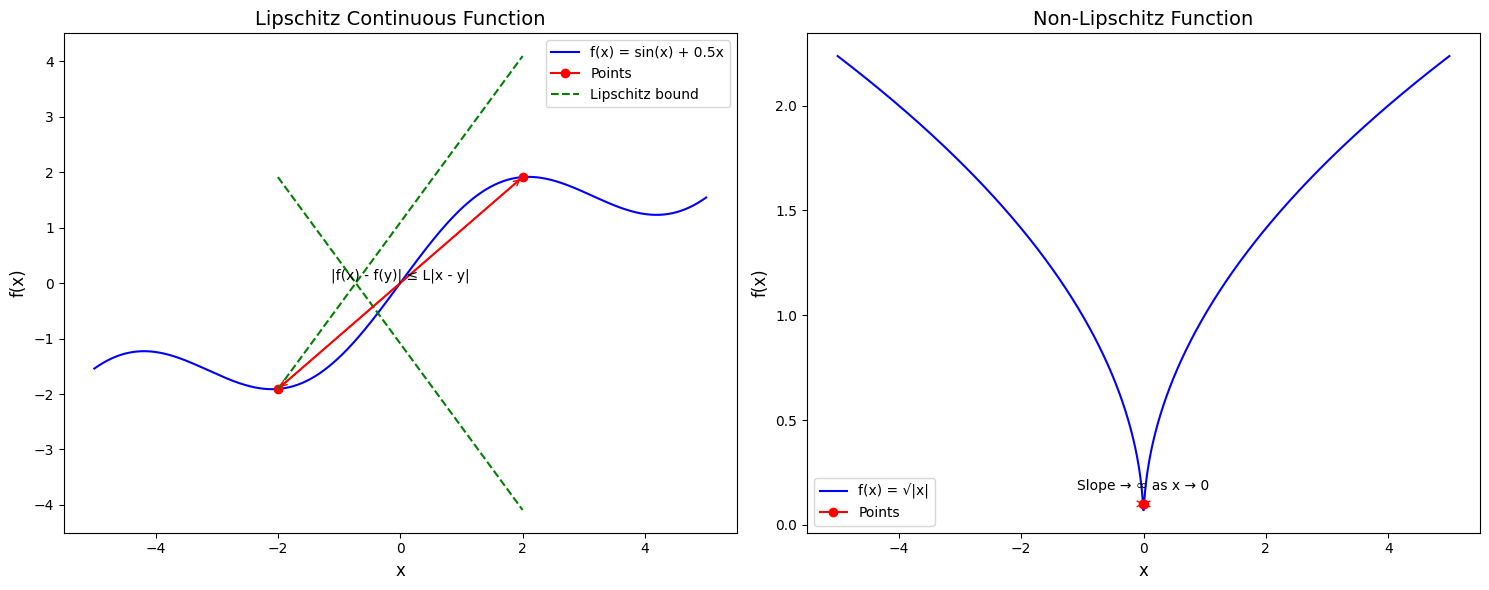

In [55]:
import numpy as np
import matplotlib.pyplot as plt

def lipschitz_function(x):
    return np.sin(x) + 0.5 * x

def non_lipschitz_function(x):
    return np.sqrt(np.abs(x))

x = np.linspace(-5, 5, 1000)
y_lipschitz = lipschitz_function(x)
y_non_lipschitz = non_lipschitz_function(x)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot Lipschitz continuous function
ax1.plot(x, y_lipschitz, 'b-', label='f(x) = sin(x) + 0.5x')
ax1.set_title('Lipschitz Continuous Function', fontsize=14)
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('f(x)', fontsize=12)

# Demonstrate Lipschitz condition
x1, x2 = -2, 2
y1, y2 = lipschitz_function(x1), lipschitz_function(x2)
ax1.plot([x1, x2], [y1, y2], 'ro-', label='Points')
ax1.plot([x1, x2], [y1, y1 + 1.5*(x2-x1)], 'g--', label='Lipschitz bound')
ax1.plot([x1, x2], [y2, y2 - 1.5*(x2-x1)], 'g--')

ax1.annotate('', xy=(x2, y2), xytext=(x1, y1),
             arrowprops=dict(arrowstyle='<->', color='red'))
ax1.text((x1+x2)/2, (y1+y2)/2, '|f(x) - f(y)| ≤ L|x - y|',
         horizontalalignment='center', verticalalignment='bottom')

ax1.legend()

# Plot non-Lipschitz function
ax2.plot(x, y_non_lipschitz, 'b-', label='f(x) = √|x|')
ax2.set_title('Non-Lipschitz Function', fontsize=14)
ax2.set_xlabel('x', fontsize=12)
ax2.set_ylabel('f(x)', fontsize=12)

# Demonstrate violation of Lipschitz condition
x1, x2 = -0.01, 0.01
y1, y2 = non_lipschitz_function(x1), non_lipschitz_function(x2)
ax2.plot([x1, x2], [y1, y2], 'ro-', label='Points')

ax2.annotate('', xy=(x2, y2), xytext=(x1, y1),
             arrowprops=dict(arrowstyle='<->', color='red'))
ax2.text(0, 0.15, 'Slope → ∞ as x → 0',
         horizontalalignment='center', verticalalignment='bottom')

ax2.legend()

plt.tight_layout()
plt.show()

# Convex optimization

See (Boyd 2006). Convex optimization algorithms are able to provide many more guarantees by making stronger restrictions. These algorithms are applicable only to convex functions - functions for which the Hessian is positive semidefinite everywhere. Such functions are well-behaved because they lack saddle points, and all their local minima are necesssarily global minima. However, most problems in deep learning are difficult to express in terms of convex optimization.

# Constrained Optimization

Karush-Kuhn-Tucker (KKT) approach provodes a very general solution to constrained optimization. With the KKT approach, we introduce a new function called the **generalized lagrangian** or *generalized lagrange function**.

TODO [ ] - Rewrite this seciton.

See (Nocedal 1999) for more information.




# Example: Linear Least Squares

Suppose we want to find a value of $x$ that minimizes

$$
  f(x) = \frac{1}{2}||Ax -b||^2_2
$$

Specialized linear algebra algorithms can solve this problem efficiently; however, we can also explore how to solve it using gradient-based optimization as a simple example of how these techniques work.

First we need to obtain the gradient:

$$
  \nabla_x f(x) = A^T(Ax-b) = A^TAx - A^Tb
$$

We can then follow this gradient downhill taking small steps.

Gradient Descent solution: [ 0.9237  1.9034 -1.3898  0.568  -0.6268]
NumPy's solution: [ 0.9237  1.9034 -1.3898  0.568  -0.6268]
True x: [ 0.9262  1.9094 -1.3986  0.563  -0.6506]


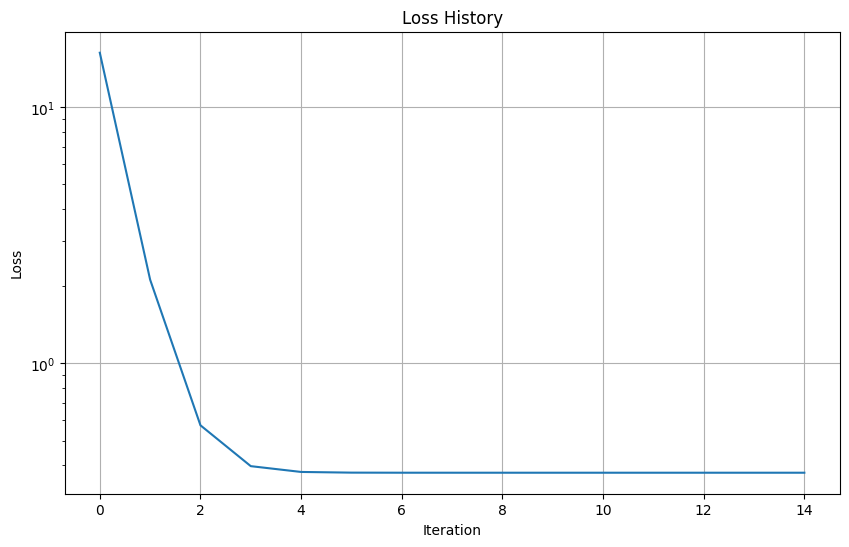

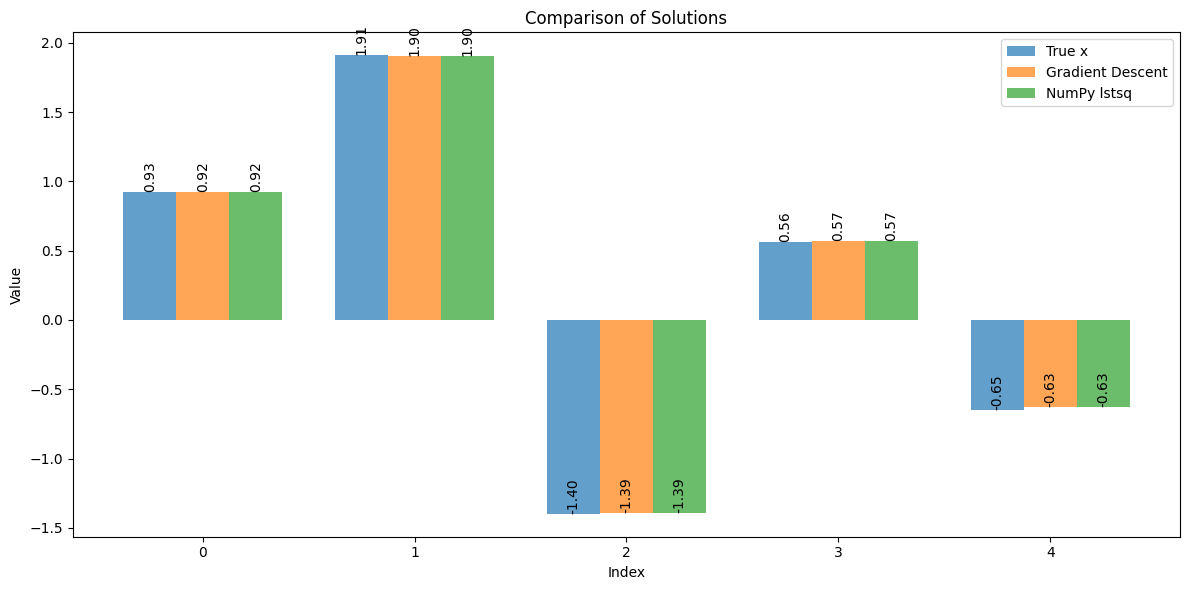

In [57]:
import numpy as np
import matplotlib.pyplot as plt

def linear_least_squares_gradient_descent(A, b, learning_rate=0.01, max_iterations=1000, tolerance=1e-6):
    m, n = A.shape
    x = np.zeros(n)

    AT = A.T
    ATb = AT @ b
    ATA = AT @ A

    loss_history = []

    for i in range(max_iterations):
        gradient = ATA @ x - ATb
        x_new = x - learning_rate * gradient

        loss = 0.5 * np.linalg.norm(A @ x_new - b)**2
        loss_history.append(loss)

        if np.linalg.norm(x_new - x) < tolerance:
            break

        x = x_new

    return x, loss_history

# Generate example data
np.random.seed(42)
m, n = 100, 5
A = np.random.randn(m, n)
x_true = np.random.randn(n)
b = A @ x_true + np.random.randn(m) * 0.1  # Add some noise

# Solve using gradient descent
x_gd, loss_history = linear_least_squares_gradient_descent(A, b)

# Solve using NumPy's built-in least squares function for comparison
x_np = np.linalg.lstsq(A, b, rcond=None)[0]

print("Gradient Descent solution:", x_gd)
print("NumPy's solution:", x_np)
print("True x:", x_true)

# Plot the loss history
plt.figure(figsize=(10, 6))
plt.plot(loss_history)
plt.title('Loss History')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.yscale('log')
plt.grid(True)
plt.show()

# Improved comparison plot
plt.figure(figsize=(12, 6))
x = np.arange(n)
width = 0.25

plt.bar(x - width, x_true, width, label='True x', alpha=0.7)
plt.bar(x, x_gd, width, label='Gradient Descent', alpha=0.7)
plt.bar(x + width, x_np, width, label='NumPy lstsq', alpha=0.7)

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Comparison of Solutions')
plt.xticks(x)
plt.legend()

# Add value labels on the bars
for i, v in enumerate(x_true):
    plt.text(i - width, v, f'{v:.2f}', ha='center', va='bottom', rotation=90)
for i, v in enumerate(x_gd):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom', rotation=90)
for i, v in enumerate(x_np):
    plt.text(i + width, v, f'{v:.2f}', ha='center', va='bottom', rotation=90)

plt.tight_layout()
plt.show()

## Newton's method

TODO [ ] - finish

## Lagrangian

TODO [ ] - finish